### PROJECT : Personal Finance Management $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Author: Adegboyega Adesanya$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Date: Feb 21, 2022



### Objectives:
- Predict/classify future spending behaviour using machine learning (Primary Objective)
- Build a scalable machine learning powered app that can handle large traffic from users.  

### Steps/Approach (CRISP-DM Methodology):
- **Business Understanding** - Understanding the business pain point from the objectives we are looking to achieve.
- **Data Gathering** - Gather relevant data to solve business problem (the provided data)
- **Data understanding** - A quick run through the data to understand each field and what it means.
- **Data Preparation:**
    - *Exploratory Data Analysis (EDA)*: Here the data is assessed and visualized to better understand it
    - *Data Cleaning/ Preprocessing*: Missing values are handled here, unwanted data are dropped or modified to suit our purpose
    - *Data Preparation for modelling*: Here we balance the dataset if possible, tokenize it, normalize/standardize the data
- **Modelling** - Using different machine learning algorithms, we train several models, tune its parameters and select one which best solve the business problem
- **Evaluation** - This is based on the selected model; we evaluate it with the holdout/ test dataset. 
- **Deployment** - The main purpose of every machine learning task is to add value to users and the best way users can benefit from our ML excercise is to deploy the model and create a web-app or an API for it. This allows users to intereact with our model and make life easier for them. 

### Technologies used (Development and Deployment):
- **Python**:
    - Modules Used:
    - Numpy: For numerical computational analysis
    - Pandas: Powerful library for data and dataframe manipulation
    - SKlearn: Machine learning module with lots of powerful libraries
    - Spacy: A very powerful natural language processing library that can perform diffent NLP tasks such as sentiment analysis, text classfication, named entity recognition etc.
    - Matplotlib, Seaborn and WordCloud: Data visualization libraries

- **AWS**:
    - Services used:
    - AWS Elastic Beanstalk (EB): This is one of the numerous AWS services for model/application deployment. EB is easy and fast to use. It also helps in scalability by spinning up instances (EC2 web servers) as traffic increases. It is very cost effective as it scales up and down depending on traffic.
    
- **Docker**: An image of our application will be created which then aid deployment on the AWS server (Elstic Beanstalk). Docker helps in managing deployment by ensuring an application can be used in any environment.
- **Git and GitHub**: Version control tools for mananging development of the application
    


In [1]:
## Import the necessary data manipulation libraries
import pandas as pd
import numpy as np

## Import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

# import text preprocessing libraries
import spacy
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import re

# import necessary Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import joblib

# other useful settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

### 1. Data Understanding 

Here the data was read in and a quick snoop through the data was made to understand each feature in it. Understanding each feature entails we understand the data types in each feature and how they can be handled for our analysis.

- To Do:
    - Read in the data
    - Check data info for data types and missing values
    - Drop duplicates if any
    - Check how balanced the dataset is based on the distribution of the target variable

In [2]:
# Read in the data and labels
data = pd.read_csv("export interview data.csv")
label = pd.read_csv('label.csv', index_col=0)

In [3]:
data.head()

,narrations,label
0,NIBSS Instant Payment Outward via GTWORLD TO W...,1
1,COMMISSION NIP TRANSFER COMMISSION FOR via GTW...,1
2,FAILED NIBSS INSTANT PAYMENT NIP Reversal: Fai...,1
3,POS/WEB PURCHASE TRANSACTION -- --Barter/FLW i...,1
4,sms alert charges doe john,24


In [4]:
## Data shape including duplicates
data.shape

(1623, 2)

In [5]:
label.head()

,label,indd,label2
0,BankCharges,24,bank_charges
1,Transfer,1,transfer
2,OnlineTransactions,2,online_transactions
3,VAT,3,vat
4,PhoneAndInternet,4,phone_and_internet


In [6]:
## Assign transaction label with original label
label_tag = dict(zip(label['indd'], label['label']))
data['label']= data['label'].replace(label_tag)

In [7]:
data.head()

,narrations,label
0,NIBSS Instant Payment Outward via GTWORLD TO W...,Transfer
1,COMMISSION NIP TRANSFER COMMISSION FOR via GTW...,Transfer
2,FAILED NIBSS INSTANT PAYMENT NIP Reversal: Fai...,Transfer
3,POS/WEB PURCHASE TRANSACTION -- --Barter/FLW i...,Transfer
4,sms alert charges doe john,BankCharges


In [8]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   narrations  1623 non-null   object
 1   label       1623 non-null   object
dtypes: object(2)
memory usage: 25.5+ KB


In [9]:
# Drop duplicate on narrations
data.drop_duplicates('narrations', inplace=True)

In [10]:
# Data shape after droping duplicates
data.shape

(1445, 2)

In [11]:
# Check how balanced the dataset is 
data['label'].value_counts()

ATMWithdrawal            195
Reversals                188
ATMwithdrawalCharges     148
LoanRepayment            108
BillsOrFees              108
VAT                       96
OfflineTransactions       83
salary                    73
CashDeposit               72
MatureLoanInstalment      55
StampDutiesCharges        39
food                      38
BankCharges               38
Transfer                  37
PhoneAndInternet          35
Rent                      25
Others                    24
OnlineTransactions        20
Investment                19
Transportation            19
Miscellaneous             12
CardRequestCommission      7
health                     6
Name: label, dtype: int64

**Note:** After the initial data understanding steps, we know:
- The initial shape of the data to be (1623, 2) which became (1445, 2) after dropping duplicates on narration. The reason for dropping duplicates on narration is to reduce redundancy in the dataset.
- We are dealing with 'object' data type
- No missing values in the data
- The dataset is not balance

### 2. Data Preparation

After the brief data understanding done above, the best way to really understand the data is to mine the data, filter and do some intense exploratory data analysis (EDA). As we know the result of analysis brings insights and a clearer persepctive which would inform better decisions moving forward.

- To Do:
    - Explore data
    - Clean the data
    - Prepare the data

In [12]:
## Load Spacy English Model for Natural Language Processing (NLP)
nlp = spacy.load('en_core_web_sm')

In [13]:
## Instantiate punctuations from string module and stopwords from spacy
punctuations = string.punctuation
stopwords = list(STOP_WORDS)

#### Created Some helper functions for re-usablility purposes

In [14]:
# Created a function to pre-process input text
def preproces_text(text):
    '''
    This function preprocesses texts in order to get a normalized string
    '''
      
    # remove url if present in text
    text_wo_urls = re.sub(r'http\S+', ' ', text)
    
    # remove mentions(@) if present in text
    text_wo_mentions = re.sub(r'@\w+', ' ', text_wo_urls)
    
    # remove hash-tags(#) if present in text
    text_wo_tags = re.sub(r'#\w+',' ', text_wo_mentions)
    
    # remove special characters({ ^ % \ ~ / ) if present in text 
    text = re.sub('[^A-Za-z]+', ' ', text_wo_tags)
    
    # using spacy english model to parse text
    tokens = nlp(text)
    
    # lemmatize tokens to their original words
    tokens = [token.lemma_.lower().strip() for token in tokens]
    
    # Filter out relevant tokens i.e tokens not in stopwords, tokens not in punctuation and token > 2 (bcos of words like ATM, POS, WEB) 
    tokens = [token for token in tokens if token not in stopwords and token not in punctuations and len(token)>2]
    
    # return normalized string
    return " ".join(tokens)


In [15]:
# Create a function to show words used in the dataset
def plot_words(text):
    '''
    This function plots words used using word cloud,
    the resulting cloud show words based on how frequently they appear in the dataset
    '''
    # instantiate word cloud
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    # set figure size
    plt.figure(figsize=(18,12))
    # Display words in the provided text
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [16]:
def count_words(word_list):
    '''
    This function count the number of occurence of words in the dataset
    '''
    result = {}
    # Get all unique words in the provided word list by iterating through word list
    for i in set(word_list):
        # Append unique word to the dictionary above
        result.setdefault('Words', []).append(i)
        # Append count of word to the dictionary above
        result.setdefault('Count', []).append(word_list.count(i))
    
    # return a dataframe with result
    return pd.DataFrame(result)
    

In [17]:
def check_labels(df, top_words):
    '''
    This function checks labels associated with common words in the data(narration)
    It helps understand underlying relationship (correlation) of narrations and labels
    '''
    result = {}
    count = 1 
    # iterate through narrations
    for i in df['narrations']:
        # check if provided top word is in narration
        if top_words in i:
            # iteratively get transaction labels associated with top word
            label = df[df['narrations'] ==i]['label'].values[0]
            # Append the label as key and increment the number of occurence
            if label in result.keys():
                result[label] += count
            else:
                result[label] = count
    
    res = pd.DataFrame(
        {'Labels': result.keys(), 'Count': result.values()}).sort_values('Count', ascending=False, ignore_index=True
    )
    # return a dataframe with result
    return res

In [18]:
def plot_label_count(df, var):
    
    '''
    This function checks labels common to the frequent words used.
    The purpose of this is understand underlying relationship between narrations and labels if any
    '''
    
    # instatiate the check label function for the assigned variable
    df_result = check_labels(df, var)
    print('##### Labels associated with ' +var+ ' naration and their count ##### \n')
    print(df_result)
    
    # plot the result out
    plt.figure(figsize=(12,6))
    plots = sns.barplot(x=df_result['Labels'],y=df_result['Count'])
    plots.set_title('Count of labels attributed with ' +var+ ' narrations')
    plots.set_ylabel('Label Count', fontsize=10)
    plots.set_xticklabels(plots.get_xticklabels(),rotation=45,horizontalalignment='right');
    
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'),  
                           (bar.get_x() + bar.get_width() / 2,  
                            bar.get_height()), ha='center', va='center', 
                           size=12, xytext=(0, 7), 
                           textcoords='offset points')

#### Initial Exploration through the data

In [19]:
# Get all words in narration
text =" ".join(data['narrations'].to_list())

In [20]:
# Number of words in the dataset
print('Number of words in dataset:', len(text.split()))

# Number of unique words in dataset makeup or vocabulary
vocab = set(text.split())
print('Vocab Size:', len(vocab))

Number of words in dataset: 14745
Vocab Size: 1952


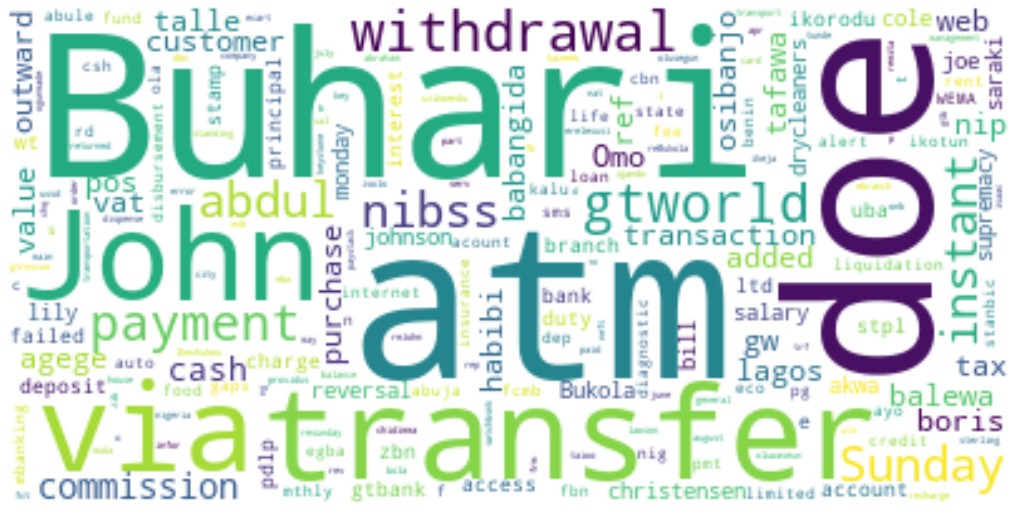

In [21]:
## Display words
plot_words(text)

#### Apply text preprocessing function to data

In [22]:
## Apply preprocess_text function to data
data['narrations']=data['narrations'].apply(lambda x: preproces_text(x))

In [23]:
data.head()

,narrations,label
0,nibs instant payment outward gtworld wema john...,Transfer
1,commission nip transfer commission gtworld fcm...,Transfer
2,failed nibs instant payment nip reversal failu...,Transfer
3,pos web purchase transaction barter flw inters...,Transfer
4,alert charge doe john,BankCharges


In [24]:
## Get all token/texts in the dataset for exploration after text preprocessing
preprocessed_texts =" ".join(data['narrations'].to_list())

In [25]:
# Number of words in the dataset after initial preprocessing
print('Number of words in dataset:', len(preprocessed_texts.split()))

# Number of unique words in dataset makeup or vocabulary
vocab = set(preprocessed_texts.split())
print('Vocab Size:', len(vocab))

Number of words in dataset: 12466
Vocab Size: 1745


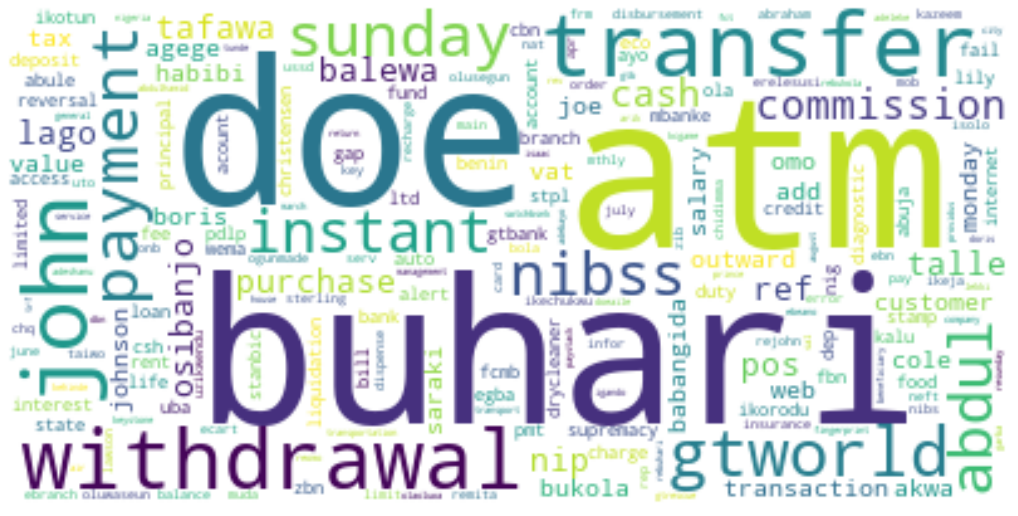

In [26]:
## Display words
plot_words(preprocessed_texts)

**Note That**: Some of the most occuring words are irrelevant in describing transaction type or spending pattern. Lets have a check on the number of top occuring words in the data.

In [27]:
## Using the count_words function
### Return Top 10 occuring words in the dataset
top_10_occuring_words = count_words(preprocessed_texts.split())
top_10_occuring_words.sort_values('Count', ascending=False)[:10]

,Words,Count
1620,atm,404
1226,buhari,351
62,doe,350
147,transfer,336
151,john,318
1011,withdrawal,281
423,gtworld,262
1240,payment,240
562,sunday,219
321,instant,201


Lets check how the top occuring words in narration relates with the target variable (labels). This would help understand if there are underlying relationships in narrations and transaction types.

##### Labels associated with atm naration and their count ##### 

                 Labels  Count
0         ATMWithdrawal    176
1  ATMwithdrawalCharges    116
2             Reversals     47
3           CashDeposit     12
4           BillsOrFees      2
5    StampDutiesCharges      1


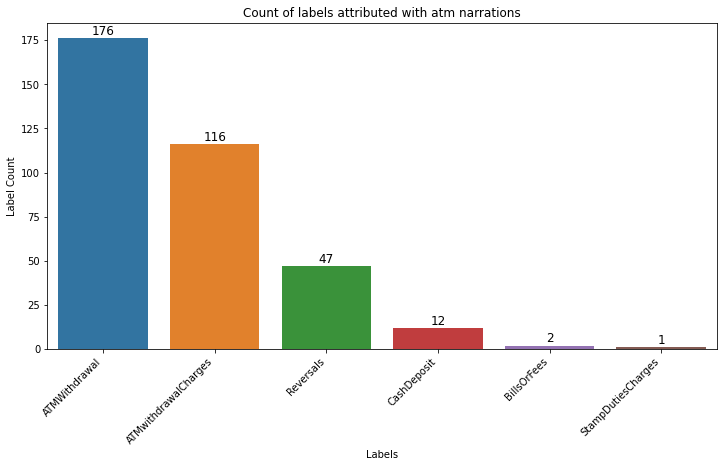

In [28]:
## Using the plot_label_coun function, lets see labels associated with the word atm
plot_label_count(data, 'atm')

##### Labels associated with buhari naration and their count ##### 

                  Labels  Count
0          ATMWithdrawal     35
1              Reversals     32
2   ATMwithdrawalCharges     32
3          LoanRepayment     27
4                 salary     19
5            BillsOrFees     18
6                    VAT     17
7            CashDeposit     16
8    OfflineTransactions     11
9   MatureLoanInstalment      9
10                  food      7
11                  Rent      7
12      PhoneAndInternet      6
13              Transfer      6
14           BankCharges      6
15                Others      6
16        Transportation      6
17            Investment      6
18    StampDutiesCharges      4
19    OnlineTransactions      4
20         Miscellaneous      2
21                health      2


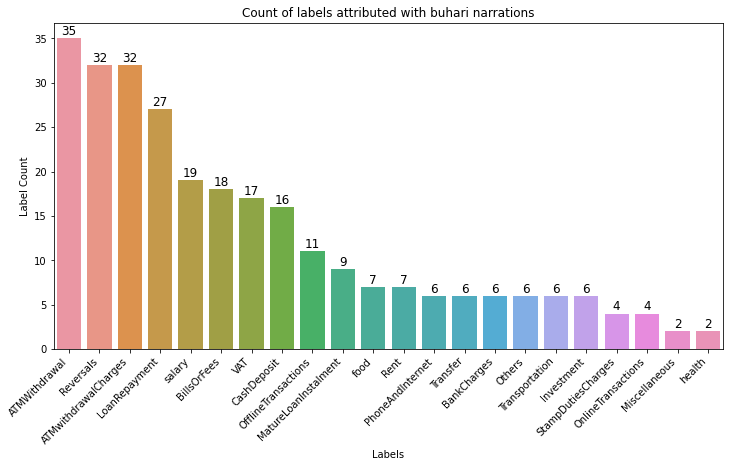

In [29]:
## Using the plot_label_coun function, lets see labels associated with the word buhari
plot_label_count(data, 'buhari')

##### Labels associated with transfer naration and their count ##### 

                  Labels  Count
0                    VAT     91
1            BillsOrFees     40
2   ATMwithdrawalCharges     37
3                 salary     24
4          LoanRepayment     22
5               Transfer     20
6                   food     17
7              Reversals     17
8          ATMWithdrawal     17
9                   Rent     13
10        Transportation      6
11   OfflineTransactions      3
12            Investment      2
13                health      1
14  MatureLoanInstalment      1


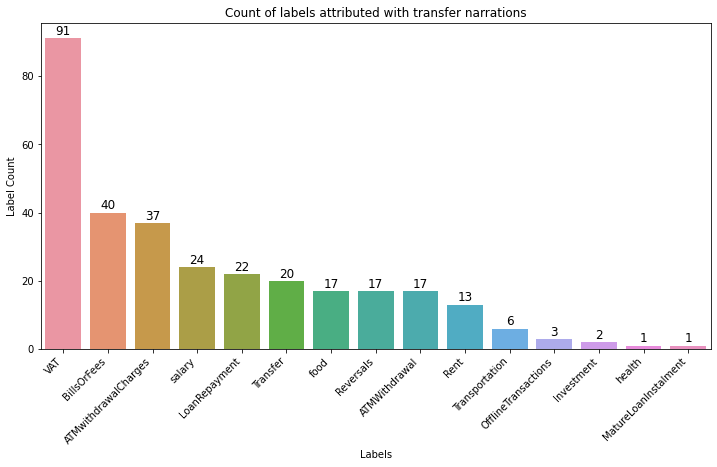

In [30]:
## Using the plot_label_coun function, lets see labels associated with the word transfer
plot_label_count(data, 'transfer')

##### Labels associated with payment naration and their count ##### 

                  Labels  Count
0              Reversals    100
1            BillsOrFees     43
2                 salary     31
3               Transfer     12
4         Transportation     12
5                   food     12
6                   Rent     11
7          LoanRepayment      4
8             Investment      3
9     OnlineTransactions      3
10  MatureLoanInstalment      2
11         Miscellaneous      1
12   OfflineTransactions      1
13         ATMWithdrawal      1


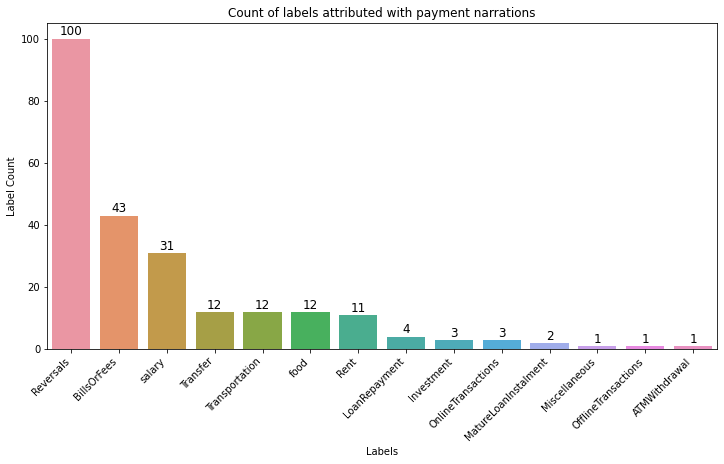

In [31]:
## Using the plot_label_coun function, lets see labels associated with the word payment
plot_label_count(data, 'payment')

As noticed, there words not best describing type of transaction or spending patern. Lets handle these words. One of the efficient ways of doing so is including them in Spacy's stop words vocabulary

In [32]:
# Add new words to spacy stop words 
from spacy.lang.en.stop_words import STOP_WORDS

new_words = [
    "buhari", 
    "babangida", 
    'osinbajo',
    'osibanjo',
    'boris',
    'johnson,',
    'sunday',
    'john',
    'doe',
    'abdul',
    'tafawa',
    'balewa',
    'bukola',
    'saraki',
    'habibi'
]

STOP_WORDS.update(new_words)

In [33]:
stopwords = list(STOP_WORDS)

In [34]:
## Apply Text Preprocessing function again which should handle all the preprocessing done and new words added to stopwords
data['narrations']=data['narrations'].apply(lambda x: preproces_text(x))

In [35]:
# Get all words in the new preprocessed data
further_preprocessed_text =" ".join(data['narrations'].to_list())

In [36]:
# Number of words in the preprocessed dataset
print('Number of words in dataset:', len(further_preprocessed_text.split()))

# Number of unique words in dataset makeup or vocabulary
vocab = set(further_preprocessed_text.split())
print('Vocab Size:', len(vocab))

Number of words in dataset: 10234
Vocab Size: 1729


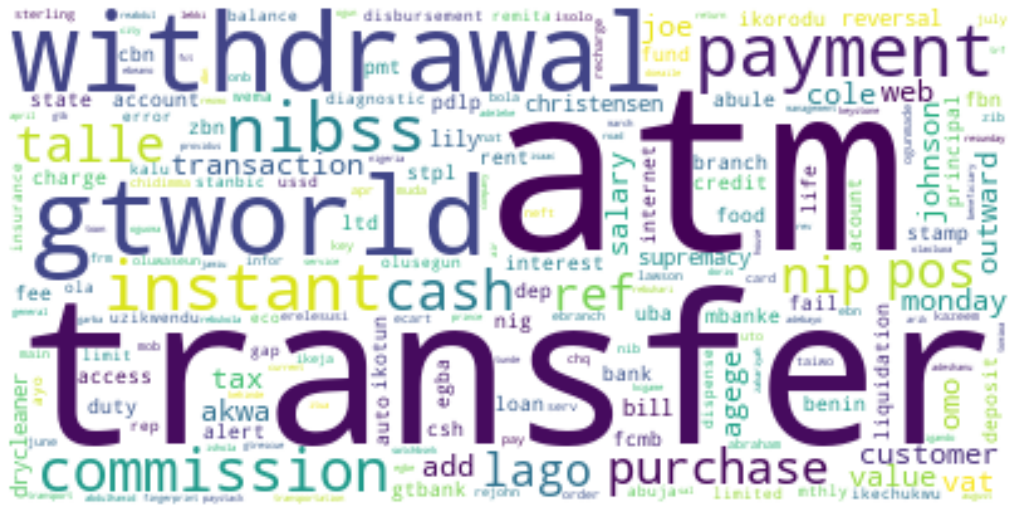

In [37]:
## plot words
plot_words(further_preprocessed_text)

As seen in the above word cloud, the data now contains words more associated with transactions and spending pattern

In [38]:
### Top 10 used words in new preprocessed data narrations
top_10_occuring_words = count_words(further_preprocessed_text.split())
top_10_occuring_words.sort_values('Count', ascending=False)[:10]

,Words,Count
1607,atm,404
147,transfer,336
1003,withdrawal,281
420,gtworld,262
1230,payment,240
318,instant,201
674,nibss,200
277,commission,187
1692,cash,160
864,pos,126


NOTE: During data prepping, we noticed:
- The data is very untidy
- Contains lot of irrelavnt words needed to predict transaction type

### 3. Modelling & Evaluation

The next step after data cleaning/ preprocessing is to model. While bunch of machine learning tasks is done during data preprocessing, modelling also require special skills and understanding in order to build a robust model.

Now that the data has been cleaned and preprocessed to some extent, we can now model.

- To Do:
    - Split the data into training and testing. 
    - Create a text preprocessing transformer module which would be essential for the type of NLP technique we are using.
    - Create a pipeline which holds all the processes involved in training the model (including the text preprocessing transformer)
    - Train at least 5 machine learning algorithms and select the best using Cross Validation Technique
    - We fit the data on the best algorithm and evaluate

#### Modeling Technique:
There are several ways of creating a text classification model. The most robust of them are trained with GPT, BERT, some deep learning techniques (RNN - LSTM, GRU) some CNN. Even though CNN is majorly used for image models. 

To use these techniques however would require large amount of dataset which we don't have. Models trained with Deep Learning techniques stores context. This contextual understanding is based on the fact that a word2vec/ word embedding layer is generated which stores contexts in sentences. As a result, they perform better than the model we will be creating using TFIDFVectorizer.


The TF-IDF Vectorizer uses a Bag-of-Words (BoW) technique which does not really care about the order of words or context in the vocabulary. It majorly focuses on the number of occurence of each words. However TF-IDF is better than some BoW techniques in that it also take into consideration the number of documents where each words appaears. As such the name **Term Frequency- Inverse Document Frequency**.

**Since this is a proof of concept excercise and given the amount data we have, TFIDF would work just fine.**

In [39]:
### Split data 
X_train, X_test, y_train,  y_test = train_test_split(data['narrations'], data['label'],test_size=0.2, random_state= 22)

In [40]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_train shape:', X_test.shape)
print('y_train shape:', y_test.shape)

X_train shape: (1156,)
y_train shape: (1156,)
X_train shape: (289,)
y_train shape: (289,)


#### Cross-Validation

Cross validation is a technique used essentially for preventing overfitting. However it also very efficient in highlighting how best our data fit into the provided algorithm in order to guide our model selection.

We will use 5 machine learning algorithms in this process of modelling; running 10 folds cross validation on them and returning the mean accuracy. This would show us how well these algorthims fit the data

In [41]:
# This function performs cross-validation on algorithms and return its mean accuracy
def select_algo(algo,X,y):
    cv_scores=cross_val_score(algo, X, y, cv=10, scoring='accuracy')
    return cv_scores.mean()

In [42]:
## The 5 selected algorithms(classifiers) to test
classifiers = []

classifiers.append(('Logistic Regression', LogisticRegression()))
classifiers.append(('Ada Boost Classifier', AdaBoostClassifier()))
classifiers.append(('KNN', KNeighborsClassifier()))
classifiers.append(('Decision Tree', DecisionTreeClassifier()))
classifiers.append(('Random Forest', RandomForestClassifier()))


In [43]:
classifiers

[('Logistic Regression', LogisticRegression()),
 ('Ada Boost Classifier', AdaBoostClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Random Forest', RandomForestClassifier())]

A text preocessing transformer was built which would be part of our machine learning pipeline. The purpose of this transformer is to clean the data going into the pipeline based on the preprocessing we did earlier. The transformer would ensure all steps taken during data preprocessing are implemented.

In [45]:
# import custom module which will implement the text preprocessing steps above in our machine learning pipeline
from textpreprocess import TextProcessingTransformer

In [46]:
#### This process would iteratively pick the above stated algorthms, create a machine learning pipeline and fit the data
best_algo = {}

for classifier in classifiers:
    
    ### Pipeline creation
    pipeline = Pipeline([('prep_text', TextProcessingTransformer()), ('tfidf', TfidfVectorizer())])
    pipeline.steps.append(classifier)
    
    ## The select_algo function is instantiated here, this would return a mean score from the cross-validation process
    cv_score = select_algo(pipeline, X_train, y_train)
    
    best_algo.setdefault('Classifier',[]).append(classifier[0])
    best_algo.setdefault('cv_score',[]).append(cv_score);

In [47]:
### The Result of the Cross Validatio process highlighting how the algorithms fit the data
pd.DataFrame(best_algo)

,Classifier,cv_score
0,Logistic Regression,0.785480
1,Ada Boost Classifier,0.218006
2,KNN,0.710247
3,Decision Tree,0.807151
4,Random Forest,0.816657


The Above process shows the best algorithm to fit the data with is the Random Forest Classifier

#### Fitting Random Forest Classifier

In [48]:
## Using Random Forest Classifier, We create a pipeline to train our model
RFC_Pipeline =  Pipeline([('prep_text', TextProcessingTransformer()), ('tfidf', TfidfVectorizer()), ('Random Forest', RandomForestClassifier())])

In [49]:
RFC_Model = RFC_Pipeline.fit(X_train, y_train)

In [50]:
predictions = RFC_Model.predict(X_test)

In [51]:
### Comparing Actual and Predicted Results
pd.DataFrame({'Actual':y_test, 'Predictions':predictions}).sample(7)

,Actual,Predictions
1199,OfflineTransactions,OfflineTransactions
694,Reversals,Reversals
932,ATMwithdrawalCharges,ATMwithdrawalCharges
1086,StampDutiesCharges,StampDutiesCharges
945,ATMwithdrawalCharges,ATMwithdrawalCharges
770,BillsOrFees,BillsOrFees
405,LoanRepayment,LoanRepayment


#### Trained Model Evaluation

In [52]:
print(classification_report(y_test, predictions))

                       precision    recall  f1-score   support

        ATMWithdrawal       0.97      0.87      0.92        39
 ATMwithdrawalCharges       0.94      1.00      0.97        34
          BankCharges       0.83      1.00      0.91         5
          BillsOrFees       0.82      0.96      0.89        28
CardRequestCommission       1.00      0.67      0.80         3
          CashDeposit       1.00      0.89      0.94        19
           Investment       1.00      0.25      0.40         4
        LoanRepayment       0.56      0.62      0.59        16
 MatureLoanInstalment       0.30      0.55      0.39        11
        Miscellaneous       1.00      0.50      0.67         4
  OfflineTransactions       0.70      1.00      0.82        16
   OnlineTransactions       1.00      0.57      0.73         7
               Others       0.67      0.29      0.40         7
     PhoneAndInternet       0.60      0.75      0.67         4
                 Rent       1.00      0.67      0.80  

#### Result Explanation:
The classification report shows some of the best metrics to evaluate machine learning classification tasks (Binary Classifications or Multi-class classifications). It gives extended report in terms of the model precision, recall, fi-score to estimating each target class and a general accuracy report. 

From our classification report it is observed the trained model has a general accuracy of 84%, and it performs well when predicting samples with ATMwithdrawalCharges, VAT, salary, and other samples with f1-score of atleast 0.80 and above. In comparison to instances with f1-score of less than 0.50 the model might not do so well. This is due to imbalace experienced in the dataset and number of samples not evenly spread accross each target class. While it is not imperative for all the target class to be equal in proportion, it expected they are fairly close to have a robust data.

F1-score is the preffered metric used here as it combines precision and recall in its computation and as such provides the best estimate when prediciting class or category of any classification problem.

Given this observations, it can be said that most samples exposed to the algorithm are ATMWithdrawal, Reversals, ATMwithdrawalCharges, BillsOrFees, VAT. For a new sample to fall under the health category, the trend, pattern and words needs to be very clear for a correct prediction to be made, otherwise it would be classified as one of the majority class.

In [53]:
### Preidct example provided in task 
RFC_Model.predict('Airtime Purchase GTWORLD-101CT0000000003236216717-2348120556688-AIRTIME')

array(['PhoneAndInternet'], dtype=object)

In [54]:
# serialize the trained model using joblib
# joblib.dump(RFC_Model, open('mono.pkl','wb'))

In [55]:
# Load serialized model
# model = joblib.load(open('mono.pkl','rb'))

In [56]:
# predict using loaded model
# model.predict('Money transfer')

### Conclusion

The trained model is doing okay but can do much better. Improving the model would require gathering more relevant clean data, using a robust algorithm utitilizing word2vec or word embedding techniques in order to preserve context in narration. By preservation of context, words like food won't need to be spelt out for the model to correctly classify the narration as food. e.g. groceries would fall under this category with a robust model.

Model improvement techniques:
- Gather more relevant "clean" data
- Ensure balance in target class (transaction label)
- Use a robust algorithm implementing word2vec (RNN-LSTM, GRU, Spacy NLP Models etc)
- Leveraging on state of the art algorithms like GPT, BERT